### Step 4 – Logistic Regression Application

1. Train a **Logistic Regression** model to classify the two true classes.
2. Plot the **decision boundary** produced by the model.
3. Compute the performance metrics: **accuracy, precision, recall, F1-score**.
***

### ⚙️ When to Use Logistic Regression

- ✅ Use it when:
  - Classes are **approximately linearly separable** (or separable with a linear decision boundary).
  - You need **probabilities** (well-calibrated scores for thresholding/ROC/PR).
  - You want a **simple, interpretable baseline** with fast training.

- 🚫 Avoid it when:
  - Data is **strongly non-linear** without feature engineering.
  - There is **heavy class imbalance** and no proper handling (class weights, calibration).
  - Features are on very different scales but you **don’t standardize** them.

***

### 🤖 **Model Hyperparameters**

- **Preprocessing:** `StandardScaler()` — standardizes input features  
- `C = 1.0` — inverse of regularization strength (smaller → stronger penalty)  
- `max_iter = 1000` — maximum number of optimization iterations  
- `random_state = 42` — reproducible parameter initialization  
***

In [1]:
%run 00-setup.py

In [2]:
from ml.data import load_dataset
from sklearn.model_selection import train_test_split
from ml.viz import plt_dboundary, plt_cmatrix

from tasks.logreg import run_logreg


In [3]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [4]:
res = run_logreg(
    X_train, y_train, X_test, y_test,
    params={"C": 1.0, "seed": 42, "max_iter": 1000}
)

print(res["test"]["metrics"])

{'accuracy': 0.9833333333333333, 'precision': 0.967741935483871, 'recall': 1.0, 'f1': 0.9836065573770492}


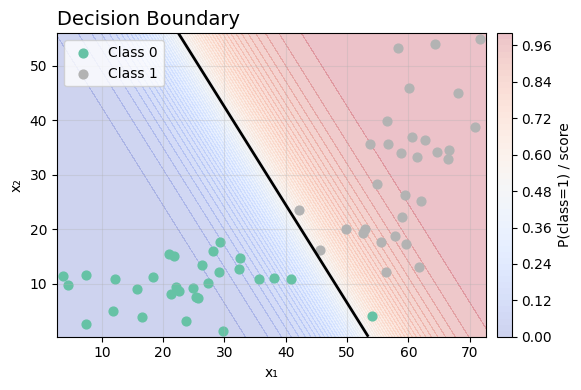

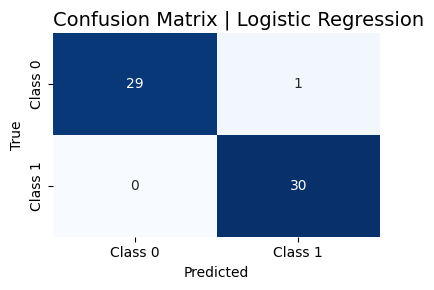

(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'left': 'Confusion Matrix | Logistic Regression'}, xlabel='Predicted', ylabel='True'>)

In [5]:
plt_dboundary(res["model"], X_test, y_test)

y_pred_test = res["test"]["y_pred"]

plt_cmatrix(
    y_true=y_test,
    y_pred=y_pred_test,
    title="Confusion Matrix | Logistic Regression"
)